### Target Analysis

    Winning The Toss and winning the match is directly proportionate - Done
    Which team has won the toss and choose to bat first most number of times
    Analysis of teams winning choosing to field first
    highest winning percentage  of which team at home ground or particular venue
    Player with most MOTM
    In the result of the matches are completely independent of the umpires, or there are umpires for whomever some particular team has won unnaturally high or low
    ratio of DL method applied and not applied
    Ratio of matches being played on a particular season

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [3]:
ipl = pd.read_csv("matches.csv")
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Winning The Toss and winning the match is directly proportionate

In [4]:
ipl['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [15]:
ipl3 = ipl[['result','winner']]
ipl3.head()

,result,winner
0,normal,Sunrisers Hyderabad
1,normal,Rising Pune Supergiant
2,normal,Kolkata Knight Riders
3,normal,Kings XI Punjab
4,normal,Royal Challengers Bangalore


In [16]:
ipl4 = ipl3[ipl3['result']=='no result']
ipl4.head()

,result,winner
300,no result,NaN
545,no result,NaN
570,no result,NaN
744,no result,NaN


In [17]:
ipl5 = ipl3[ipl3['result']=='tie']
ipl5.head()

,result,winner
33,tie,Mumbai Indians
125,tie,Rajasthan Royals
189,tie,Kings XI Punjab
387,tie,Sunrisers Hyderabad
400,tie,Royal Challengers Bangalore


In [5]:
# create a new column indicating the match outcome 
ipl['match_outcome'] = ipl['result'].map({
    'normal': 1,
    'tie':0,
    'no result':-1
})

In [6]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_outcome
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1


In [14]:
match_df = ipl[['result','match_outcome']]
match_df1 = match_df[match_df['result']=='no result']
match_df1.head()

,result,match_outcome
300,no result,-1
545,no result,-1
570,no result,-1
744,no result,-1


In [18]:
ipl.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_outcome'],
      dtype='object')

In [19]:
ipl['toss_win_match_win'] = ipl.apply(
    lambda row: 1 if row['toss_winner'] == row['winner'] else 0 , axis=1
)

In [20]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_outcome,toss_win_match_win
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1,1
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1,1
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1,1
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,1


In [21]:
correlation = ipl['toss_win_match_win'].corr(ipl['match_outcome'])

In [22]:
correlation

0.05630063413968335

In [24]:
cross_tab = pd.crosstab(ipl['toss_win_match_win'],ipl['match_outcome'])
cross_tab

match_outcome,-1,0,1
toss_win_match_win,,,
0,4,4,355
1,0,5,388


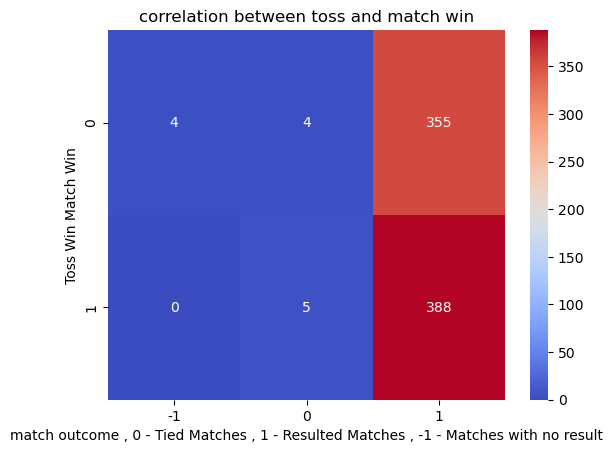

In [28]:
ax = sns.heatmap(cross_tab,annot=True,fmt = "d",cmap = "coolwarm",cbar= True)
plt.title("correlation between toss and match win")
plt.xlabel("match outcome , 0 - Tied Matches , 1 - Resulted Matches , -1 - Matches with no result")
plt.ylabel("Toss Win Match Win")
plt.show()


In [29]:
ipl.to_csv("updated_ipl.csv")